# Murugiah_NavinKarthik_Assignment2

** Importing Libraries **

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

from pandas_datareader import DataReader

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [10]:
# List of Company_stocks for analytics
comp_lst = ['BAC','JPM','MS','GOOGL','MSFT','NKE']

# set up Start and Final time frame
final = datetime.now()
start = datetime(final.year-1,final.month,final.day)

# Pull the stock information for the required companies from google

for stock in comp_lst:
    globals()[stock] = DataReader(stock,'google',start,final)

** 1. Line Chart depicting closing prices of Nike over the last one year **

Text(0.5,1,'Closing Price of Nike Daily Stocks')

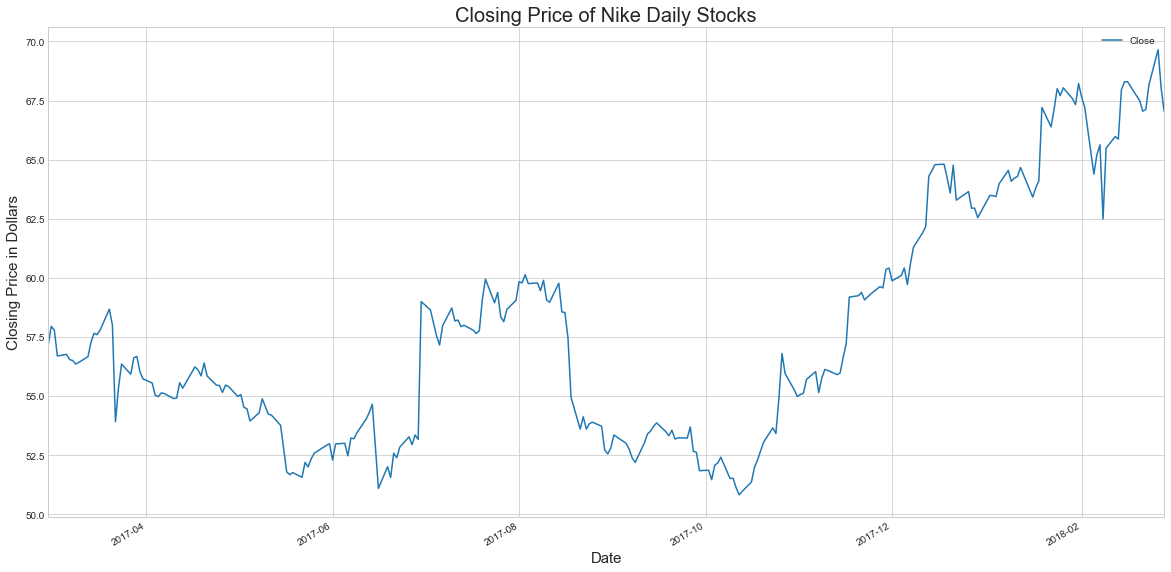

In [29]:
# Let's see a historical view of the closing price
NKE['Close'].plot(legend=True, figsize=(20,10))
plt.ylabel('Closing Price in Dollars',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Closing Price of Nike Daily Stocks',fontsize=20)

** 2. Line Chart depicting volume of Nike stocks sold ** 

Text(0.5,1,'Volume of Nike Daily Stocks')

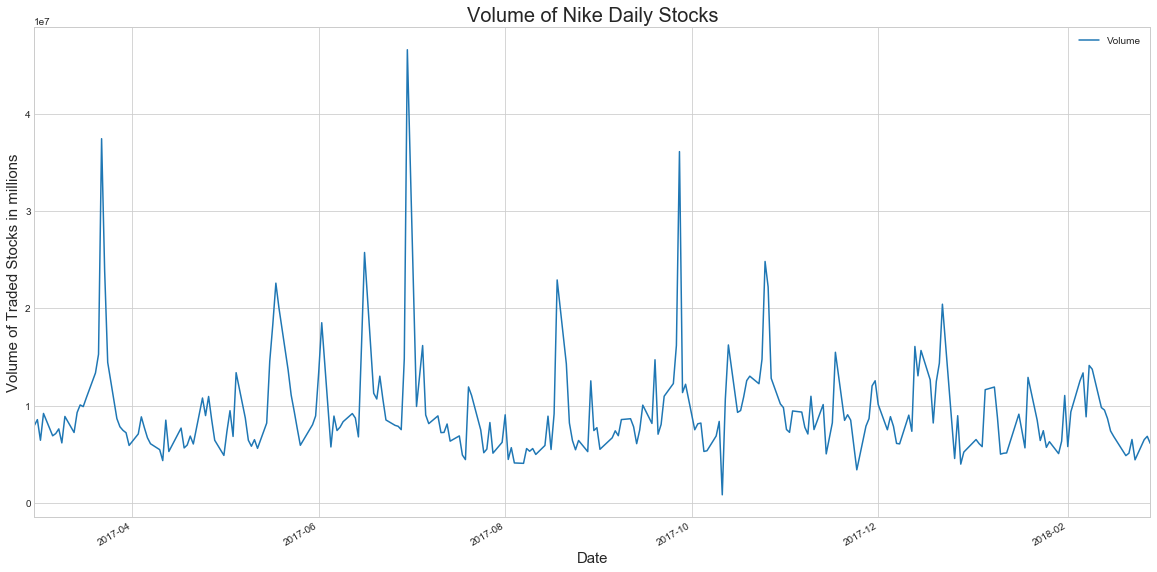

In [30]:
NKE['Volume'].plot(legend=True, figsize=(20,10))
plt.ylabel('Volume of Traded Stocks in millions',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Volume of Nike Daily Stocks',fontsize=20)

** 3. Correlation to closing price and volume of stocks bought for Nike **

Text(0.5,1,'Closing vs Volume of Nike Daily Stocks')

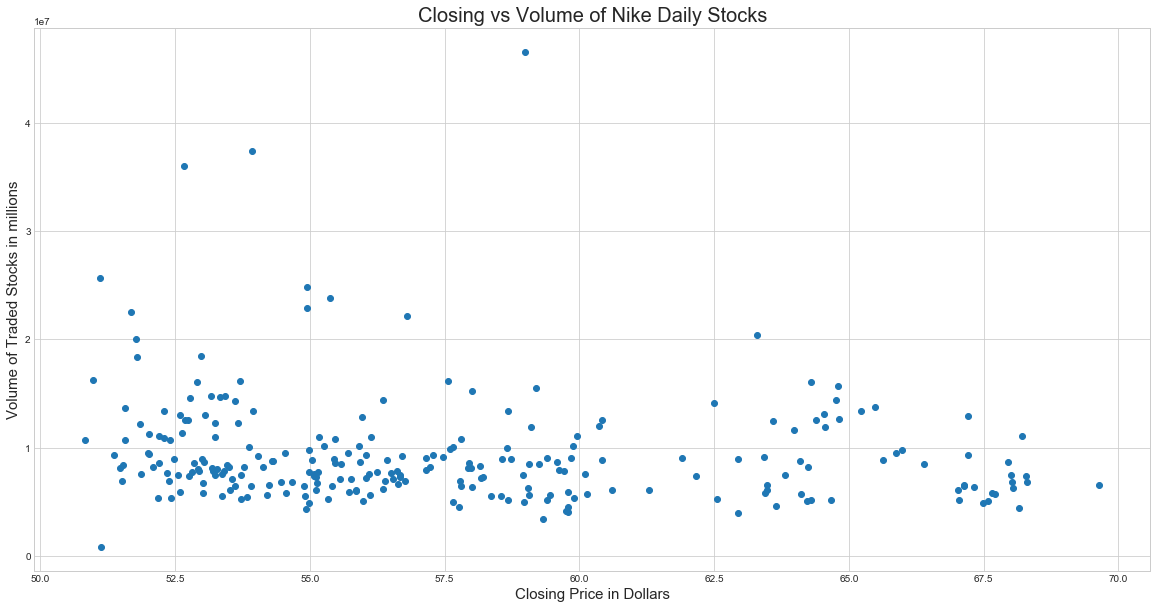

In [37]:
#Closing vs Volume
plt.figure(figsize=(20,10))
plt.scatter(NKE['Close'], NKE['Volume'])
plt.xlabel('Closing Price in Dollars',fontsize=15)
plt.ylabel('Volume of Traded Stocks in millions',fontsize=15)
plt.title('Closing vs Volume of Nike Daily Stocks',fontsize=20)

** 4. Moving Average in the range of 20, 40, 60, 80 and 100 days for Bank of America Corp Stocks **

Text(0.5,1,'Moving Average of Closing price of Bank of America Corp')

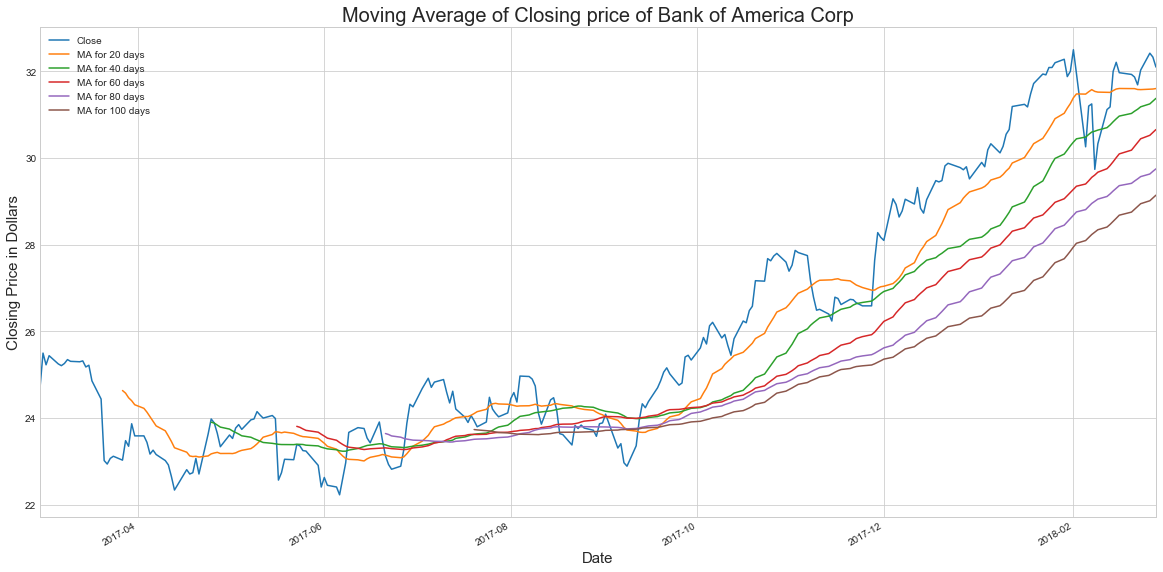

In [46]:
MA_day = [20, 40, 60, 80, 100]

for ma in MA_day:
    col = 'MA for {0} days' .format(str(ma))
    BAC[col] = BAC.Close.rolling(ma).mean()
    
BAC[['Close','MA for 20 days','MA for 40 days','MA for 60 days','MA for 80 days','MA for 100 days']].plot(subplots=False,figsize=(20,10))
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price in Dollars',fontsize=15)
plt.title('Moving Average of Closing price of Bank of America Corp',fontsize=20)


** 5. Line chart depicting rate of change of closing price of Bank of America Corp **

Text(0.5,1,'Rate of Change of Closing price of Bank of America Corp in 2017')

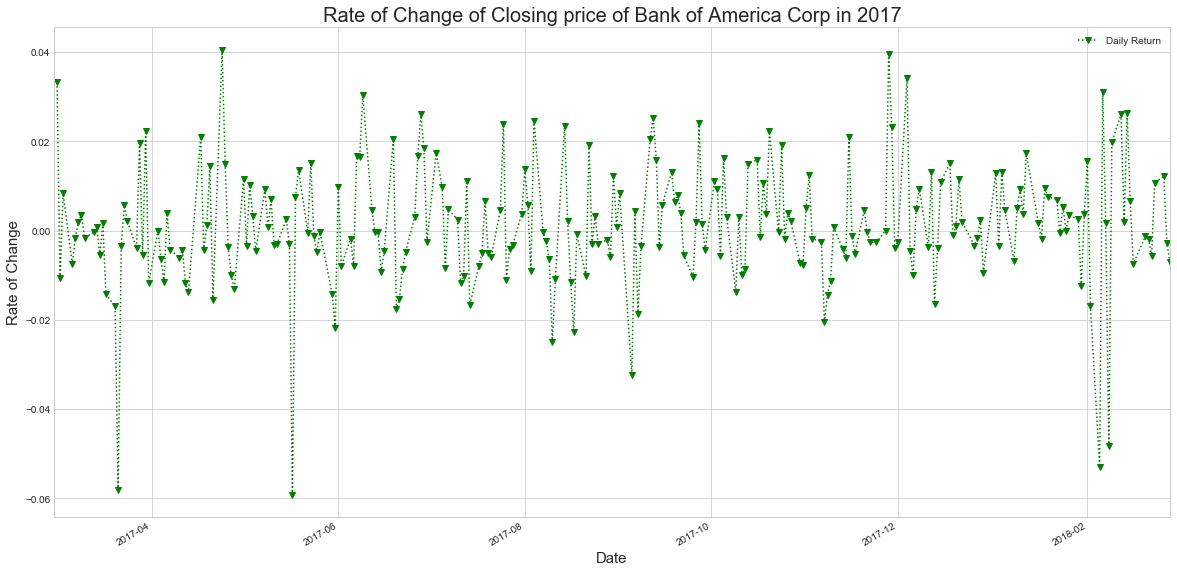

In [50]:
# Calculate the percent change for each day using pct_changeCalculate()
BAC['Daily Return'] = BAC['Close'].pct_change()

# Plot the daily return percentage
BAC['Daily Return'].plot(figsize=(20,10), legend=True, linestyle=':', marker='v',color='green')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Rate of Change',fontsize=15)
plt.title('Rate of Change of Closing price of Bank of America Corp in 2017',fontsize=20)

** 6. Line chart depicting rate of change of prices for Bank of America, JP Morgan and Morgan Stanley **

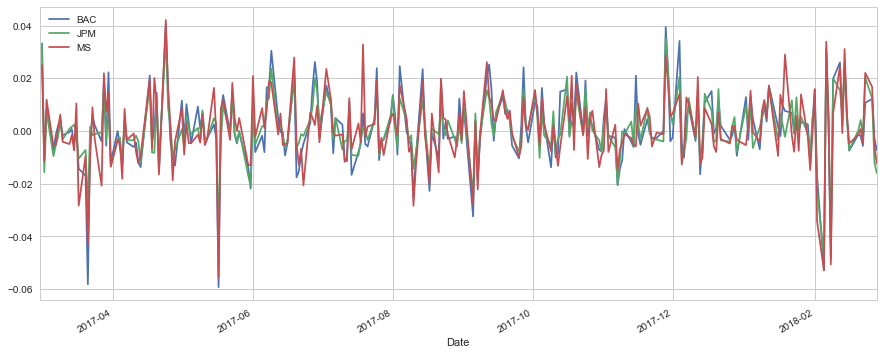

In [65]:
banks_list = ['BAC','JPM','MS']
closingprice_banks = DataReader(banks_list, 'google', start, final)['Close']
bank_returns = closingprice_banks.pct_change()
bank_returns.plot(legend=True, figsize=(15,6))

** 7. Pairwise correlation chart depicting how correlated the rate of change of JP Morgan, Bank of America and Morgan Stanley stocks **

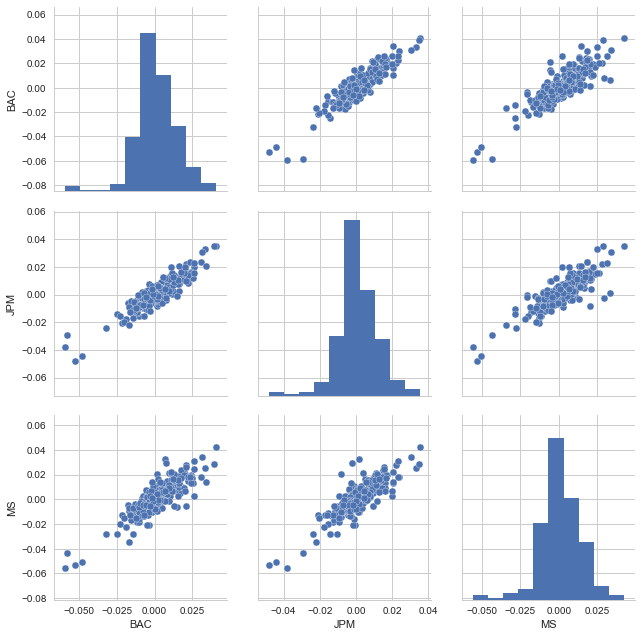

In [49]:
sns.pairplot(bank_returns.dropna(),size=3)

** 8. Heatmap show correlation between rate of change of price between Bank of America Corp, JP Morgan and Morgan Stanley **

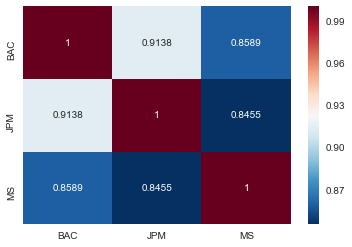

In [50]:
sns.heatmap(bank_returns.corr(),annot=True,fmt=".4g",cmap='RdBu_r')

** 9. Line Chart to study to correlation between rate of change of Google, Amazon and Nike stocks **

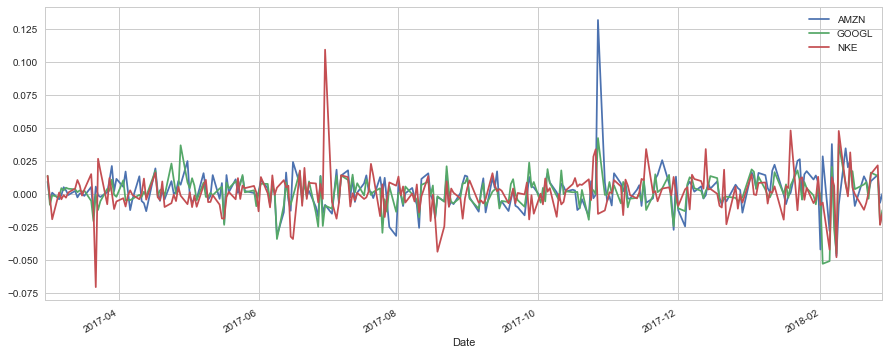

In [66]:
tech_list = ['GOOGL','AMZN','NKE']
closingprice_tech = DataReader(tech_list, 'google', start, final)['Close']
tech_returns = closingprice_tech.pct_change()
tech_returns.plot(legend=True, figsize=(15,6))

** 10. Pairwise correlation chart for rate of change of price for Nike, Amazon and Google stocks **

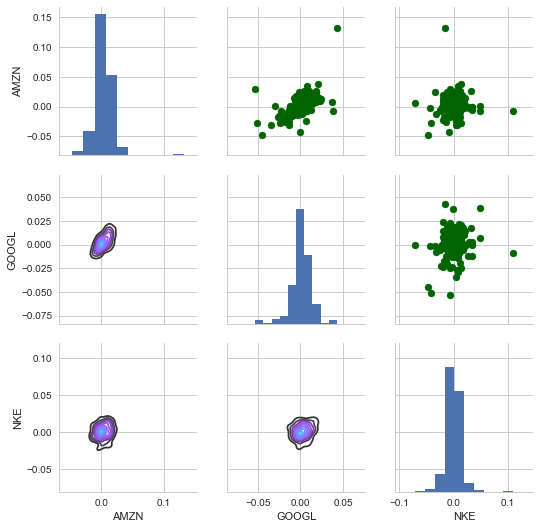

In [75]:
paircombi = sns.PairGrid(tech_returns.dropna())
paircombi.map_upper(plt.scatter,color='darkgreen')
paircombi.map_lower(sns.kdeplot,cmap='cool_d')
paircombi.map_diag(plt.hist,bins=10)

** 11. Heatmap for correlation between rate of change of Google, Amazon and Nike stocks **

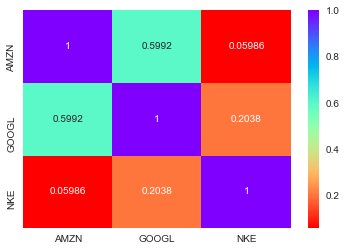

In [80]:
sns.heatmap(tech_returns.corr(),annot=True,fmt=".4g",cmap='rainbow_r')

** 12. Histogram of daily returns for Bank of America Corp Stocks **

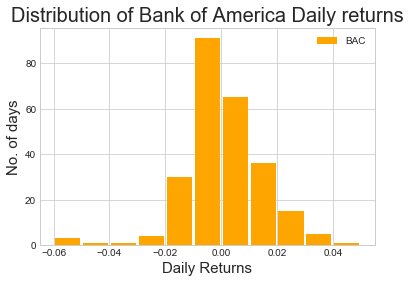

In [79]:
plt.hist(BAC['Daily Return'], bins=np.arange(-0.06,0.06,0.01,dtype=float), range = (BAC['Daily Return'].min(),BAC['Daily Return'].max()), rwidth=0.9,color='orange',label="BAC")[-1]
plt.xlabel("Daily Returns",fontsize=15)
plt.ylabel("No. of days",fontsize=15)
plt.title("Distribution of Bank of America Daily returns",fontsize=20)
plt.legend()